<a href="https://colab.research.google.com/github/sofial47/senalesysistemas/blob/main/cuaderno1parcialse%C3%B1alesysistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

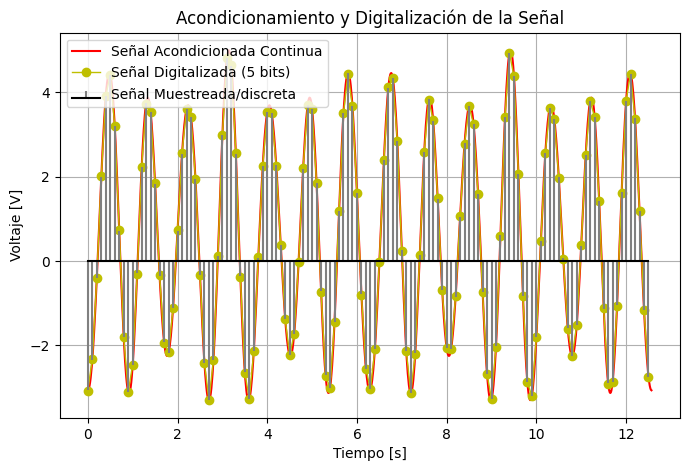

In [ ]:
#1
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal y sistema
bits = 8
niveles = 2 ** bits  # 32 niveles
V_min = -3.3
V_max = 5.0

# Frecuencia fundamental (para graficar periodos)
f0 = 1 / (2 * np.pi)   # ~0.159 Hz
T0 = 1 / f0            # Periodo fundamental ≈ 2π

# Frecuencia de muestreo
fs = 10 # Hz, mucho mayor que 2*fmax para evitar aliasing
Ts = 1 / fs

# Tiempo para graficar al menos 2 periodos de la señal (tiempo continuo)
t_cont = np.linspace(0, 2 * T0, 1000)  # tiempo continuo para suavidad

# Señal original continua
x_cont = 20 * np.sin(7 * t_cont - np.pi/2) - 3 * np.cos(5 * t_cont) + 2 * np.cos(10 * t_cont)

# Obtener rango original para acondicionar
x_min, x_max = np.min(x_cont), np.max(x_cont)

# Escalar señal al rango [V_min, V_max]
x_scaled_cont = (x_cont - x_min) / (x_max - x_min) * (V_max - V_min) + V_min

# Tiempo discreto para muestreo
t_disc = np.arange(0, 2 * T0, Ts)

# Señal muestreada (discreta)
x_disc = 20 * np.sin(7 * t_disc - np.pi/2) - 3 * np.cos(5 * t_disc) + 2 * np.cos(10 * t_disc)

# Acondicionar señal muestreada al rango [V_min, V_max]
x_scaled_disc = (x_disc - x_min) / (x_max - x_min) * (V_max - V_min) + V_min

# Cuantización (digitalización)
paso = (V_max - V_min) / (niveles - 1)
x_digital = np.round((x_scaled_disc - V_min) / paso) * paso + V_min

# Graficar con plt.plot y plt.stem según indicaste
plt.figure(figsize=(8, 5))

plt.plot(t_cont, x_scaled_cont, c='r', label='Señal Acondicionada Continua')
plt.plot(t_disc, x_digital, c='y', marker='o', label='Señal Digitalizada (5 bits)', linewidth=1)
plt.stem(t_disc, x_scaled_disc, label='Señal Muestreada/discreta', basefmt='k-', linefmt='grey', markerfmt=' ')

plt.title('Acondicionamiento y Digitalización de la Señal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.grid()
plt.legend()
plt.show()


In [ ]:
#2
# Señal original continua: x(t) = 3*cos(2π*5500*t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t) 10*cos(2π*5500*t)
#f_original = 5500  # Hz (frecuencia peligrosa para aliasing)
#A = 10
#duracion = 0.002  # 2 ms para ver algunas oscilaciones

# Tiempo continuo (referencia)
#fs_ref = 200000  # muy alta para simular señal "real" continua
#t_cont = np.arange(0, duracion, 1/fs_ref)
#x_cont = A * np.cos(2 * np.pi * f_original * t_cont)

# Caso 1: Frecuencia de muestreo incorrecta (aliasing)
#fs_mala = 5000  # Hz < 2*fmax
#t_mala = np.arange(0, duracion, 1/fs_mala)
#x_mala = A * np.cos(2 * np.pi * f_original * t_mala)

# Caso 2: Frecuencia de muestreo adecuada (sin aliasing)
#fs_buena = 22000  # Hz > 2*fmax
#t_buena = np.arange(0, duracion, 1/fs_buena)
#x_buena = A * np.cos(2 * np.pi * f_original * t_buena)

# Graficar
#plt.figure(figsize=(8, 5))

# Señal original
#plt.plot(t_cont * 100, x_cont, label='Señal continua (referencia)', color='gray', linewidth=1)

# Señal muestreada mal (alias)
#plt.stem(t_mala * 100, x_mala, linefmt='r-', markerfmt='ro', basefmt=' ', label='Muestreo incorrecto (5 kHz)')

# Señal muestreada bien
#plt.stem(t_buena * 100, x_buena, linefmt='g-', markerfmt='go', basefmt=' ', label='Muestreo correcto (22 kHz)')

#plt.title('Comparación: Aliasing vs Muestreo correcto')
#plt.xlabel('Tiempo [ms]')
#plt.ylabel('x(t)')
#plt.grid(True)
#plt.legend()
#plt.tight_layout()
#plt.show()


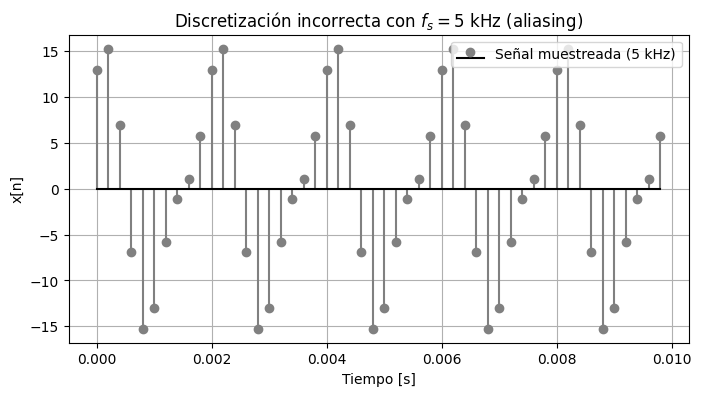

In [ ]:
fs= 5000  # Frecuencia de muestreo NO adecuada
t = np.arange(0, 0.01, 1/fs)  # 10 ms de señal

# Señal original (continua, evaluada solo en puntos muestreados)
x = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

plt.figure(figsize=(8, 4))
plt.stem(t, x, linefmt='gray', markerfmt='o', basefmt='k-', label='Señal muestreada (5 kHz)')
plt.title('Discretización incorrecta con $f_s = 5$ kHz (aliasing)')
plt.xlabel('Tiempo [s]')
plt.ylabel('x[n]')
plt.grid(True)
plt.legend()
plt.show()


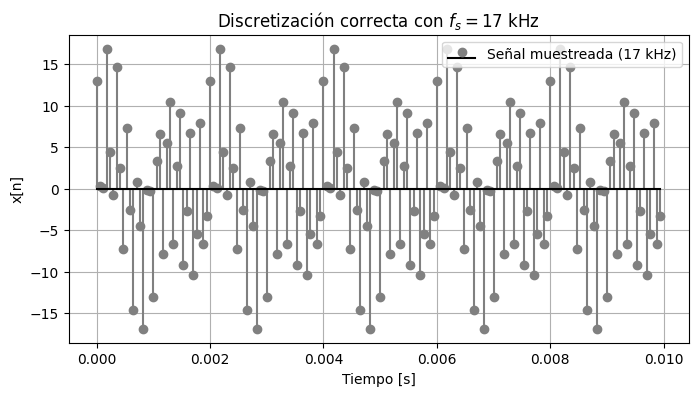

In [ ]:
fs=17000  # Frecuencia de muestreo adecuada
t = np.arange(0, 0.01, 1/fs)  # 10 ms de señal

# Señal original (continua, evaluada solo en puntos muestreados)
x = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

plt.figure(figsize=(8, 4))
plt.stem(t, x, linefmt='gray', markerfmt='o', basefmt='k-', label='Señal muestreada (17 kHz)')
plt.title('Discretización correcta con $f_s = 17$ kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('x[n]')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
#3
import sympy as sp

# Definir variables simbólicas
t, T, A = sp.symbols('t T A', positive=True)
w0 = 2 * sp.pi / T

# Definir x1(t)
x1 = A * sp.cos(w0 * t)

# Definir x2(t) por tramos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t <= T))
)

# Diferencia al cuadrado
diff_squared = (x1 - x2)**2

# Calcular la distancia media
d_expr = (1/T) * sp.integrate(diff_squared, (t, 0, T))
d_simplified = sp.simplify(d_expr)

# Mostrar resultado
sp.pprint(d_simplified)


 2          
A    4⋅A    
── - ─── + 1
2     π     


Tabla de coeficientes:


,n,a_n (parte real),b_n (parte imaginaria),|c_n| (magnitud),"∠c_n (fase, rad)"
0,-5,-0.016211,0.0,0.016211,3.141593
1,-4,-0.000000,0.0,0.000000,3.141593
2,-3,-0.045032,0.0,0.045032,3.141593
3,-2,0.202642,0.0,0.202642,0.000000
4,-1,-0.405285,0.0,0.405285,3.141593
5,0,0.000000,0.0,0.000000,0.000000
6,1,-0.405285,0.0,0.405285,3.141593
7,2,0.202642,0.0,0.202642,0.000000
8,3,-0.045032,0.0,0.045032,3.141593
9,4,-0.000000,0.0,0.000000,3.141593


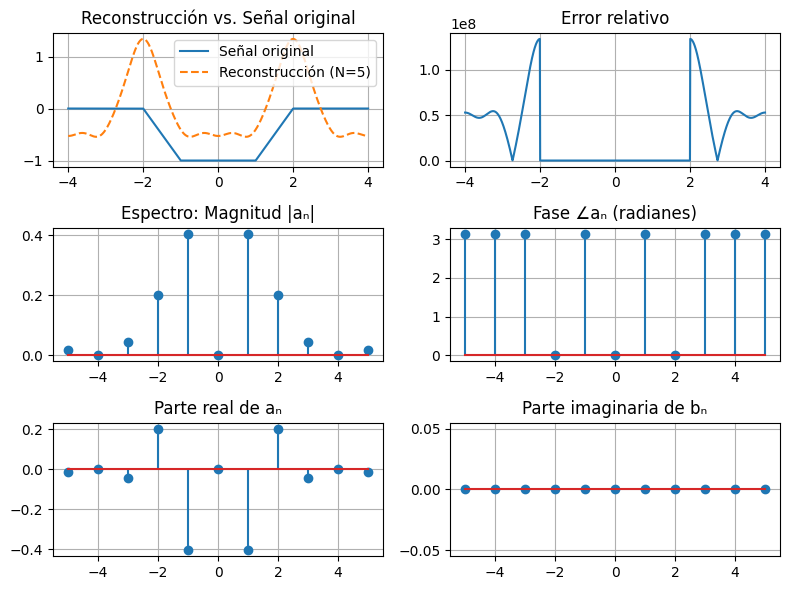

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros de la señal trapezoidal
A = 1
d1 = 1
d2 = 2
T = 2 * d2
w0 = 2 * np.pi / T

# Coeficiente an (solo cosenos porque la señal es par)
def an(n):
    if n == 0:
        return 0
    factor = -4 * A / (T * (n * w0)**2 * (d2 - d1))
    return factor * (np.cos(n * w0 * d1) - np.cos(n * w0 * d2))

# Señal original (exacta) por tramos
def x_exact(t):
    t = np.array(t)
    x = np.zeros_like(t)
    m = A / (d2 - d1)
    x += ((t > -d2) & (t < -d1)) * (-m * (t + d2))
    x += ((t >= -d1) & (t <= d1)) * (-A)
    x += ((t > d1) & (t < d2)) * (m * (t - d1) - A)
    return x

# Reconstrucción con serie de Fourier
N = 5
t_vals = np.linspace(-T, T, 1000)
x_recon = np.zeros_like(t_vals)

for n in range(-N, N + 1):
    a_n = an(abs(n)) if n != 0 else 0
    x_recon += a_n * np.cos(n * w0 * t_vals)

x_true = x_exact(t_vals)

# Error relativo
error = np.abs(x_recon - x_true)
relative_error = error / (np.abs(x_true) + 1e-8)

# Espectro
n_vals = np.arange(-N, N + 1)
a_vals = np.array([an(abs(n)) if n != 0 else 0 for n in n_vals])
b_vals = np.zeros_like(a_vals)
mag_vals = np.abs(a_vals)
phase_vals = np.angle(a_vals)

# Tabla de coeficientes
df = pd.DataFrame({
    'n': n_vals,
    'a_n (parte real)': a_vals,
    'b_n (parte imaginaria)': b_vals,
    '|c_n| (magnitud)': mag_vals,
    '∠c_n (fase, rad)': phase_vals
})
print("Tabla de coeficientes:")
display(df)

# Gráficas
plt.figure(figsize=(8, 6))

plt.subplot(3, 2, 1)
plt.plot(t_vals, x_true, label="Señal original")
plt.plot(t_vals, x_recon, '--', label="Reconstrucción (N=5)")
plt.title("Reconstrucción vs. Señal original")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t_vals, relative_error)
plt.title("Error relativo")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.stem(n_vals, mag_vals,)
plt.title("Espectro: Magnitud |aₙ|")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.stem(n_vals, phase_vals, )
plt.title("Fase ∠aₙ (radianes)")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.stem(n_vals, a_vals, )
plt.title("Parte real de aₙ")
plt.grid(True)

plt.subplot(3, 2, 6)
plt.stem(n_vals, b_vals, )
plt.title("Parte imaginaria de bₙ")
plt.grid(True)

plt.tight_layout()
plt.show()
